<a href="https://colab.research.google.com/github/AliAramideh/Classification_churnData/blob/main/Classification_churnData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

---

In The Name Of God
<center>

# Author: **Ali Aramideh**

# Classification

## Import needed packages

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report, f1_score, jaccard_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Underestanding the Dataset

### Load the data

In [31]:
url = 'https://github.com/AliAramideh/Classification_churnData/raw/main/ChurnData.csv'
dataset = pd.read_csv(url)
pd.set_option('display.max_columns', None)
dataset

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.00,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.00,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.00,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.10,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.00,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,24.50,0.00,14.25,0.0,973.10,1343.50,720.0,0.0,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,28.00,0.00,12.75,0.0,203.25,959.40,435.0,0.0,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,23.75,0.00,12.50,0.0,29.90,128.45,80.0,0.0,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,47.75,0.00,32.75,64.0,186.60,1152.90,780.0,1.0,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


### About the dataset

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.

This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

*   Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*   Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents


That is all about this dataset.
We assume that `ed` is education



In [32]:
data_clean = dataset[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless','churn']]
data_clean['churn'] = data_clean['churn'].astype('int')
data_clean

<ipython-input-32-abc9fa740f70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['churn'] = data_clean['churn'].astype('int')


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,1


In [33]:
dataset['churn'].value_counts()

0.0    142
1.0     58
Name: churn, dtype: int64

In [34]:
data_clean.shape

(200, 10)

Let's define X and y

In [35]:
X = data_clean.drop(columns=['churn'])
X

,tenure,age,address,income,ed,employ,equip,callcard,wireless
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0


In [36]:
y = data_clean['churn']
y

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    1
199    0
Name: churn, Length: 200, dtype: int64

In [37]:
print(X.shape)
print(y.shape)

(200, 9)
(200,)


### Normalization

In [38]:
# from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-1.13518441, -0.62595491, -0.4588971 , ..., -0.85972695,
         0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, ..., -0.85972695,
        -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , ..., -0.85972695,
        -1.54590766, -0.63910148],
       ...,
       [-1.36680743, -0.7026181 , -0.16283445, ..., -0.85972695,
         0.64686916, -0.63910148],
       [-0.53296457, -0.85594447, -1.14970993, ..., -0.85972695,
         0.64686916,  1.56469673],
       [ 1.18104577,  0.67731925,  0.42929083, ...,  1.16316   ,
         0.64686916,  1.56469673]])

### Split dataset(trani/test)
Now we should split our data to train and test sets.

In [39]:
# from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.2, random_state=4)

print('The shape of train set of X: ', train_X.shape)
print('The shape of test set of X: ', test_X.shape)
print('The shape of train set of y: ', train_y.shape)
print('The shape of test set of y: ', test_y.shape)


The shape of train set of X:  (160, 9)
The shape of test set of X:  (40, 9)
The shape of train set of y:  (160,)
The shape of test set of y:  (40,)


## Logistic Regression

### What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression function and transforming the numeric estimate into a probability with the following function, which is called the sigmoid function 𝜎:

$$
ℎ\_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}}
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="400" align="center">

The objective of the **Logistic Regression** algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.


### Modeling

Let's build our model using **LogisticRegression** from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
**C** parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization.
Now let's fit our model with train set:


In [40]:
# from sklearn.linear_model import LogisticRegression

model_log_reg = LogisticRegression(C= 0.01, solver= 'liblinear').fit(train_X, train_y)

In [41]:
pred_y_log_reg = model_log_reg.predict(test_X)

**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [42]:
pred_y_log_reg_prob = model_log_reg.predict_proba(test_X)
print(test_y.values[0:5])
print(pred_y_log_reg[0:5])
print(pred_y_log_reg_prob[0:5])

[0 0 1 0 1]
[0 0 0 0 0]
[[0.58711718 0.41288282]
 [0.56650898 0.43349102]
 [0.5313329  0.4686671 ]
 [0.66722528 0.33277472]
 [0.53481231 0.46518769]]


In `predict_proba` method, the first column represents the probability of the negative class and the second column represents the probability of the positive class.

### Evaluation

#### jaccard index

Let's try the jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [43]:
# from sklearn.metrics import jaccard_score

jaccard_score_log_reg = jaccard_score(test_y, pred_y_log_reg, pos_label=0)
print('Jaccard Score: %.4f' % jaccard_score_log_reg)

Jaccard Score: 0.5625


#### accuracy score

In [44]:
# from sklearn.metrics import accuracy_score

accuracy_score_log_reg = accuracy_score(test_y, pred_y_log_reg)
print('Accuracy Score: ', accuracy_score_log_reg)

Accuracy Score:  0.65


#### confusion matrix

Another way of looking at the accuracy of the classifier is to look at **confusion matrix**.


In [45]:
# from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [46]:
print(confusion_matrix(test_y, pred_y_log_reg))

[[18  7]
 [ 7  8]]


Confusion matrix, without normalization
[[ 8  7]
 [ 7 18]]


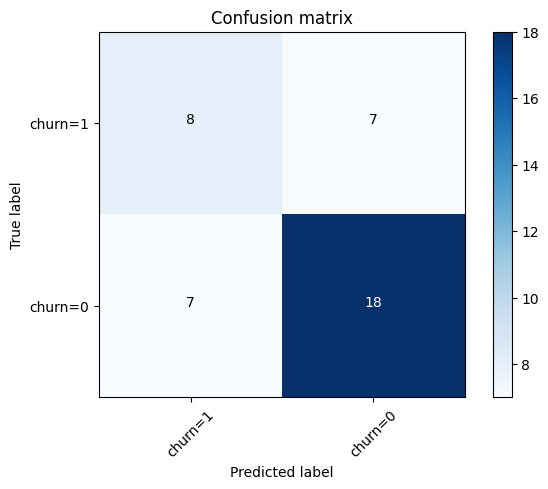

In [47]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, pred_y_log_reg, labels=[1,0])

# Plot non_normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Look at first row. The first row is for customers whose actual churn value in the test set is 1.
As you can calculate, out of 40 customers, the churn value of 10 of them is 1.
Out of these 10 cases, the classifier correctly predicted 8 of them as 1, and 2 of them as 0.

This means, for 8 customers, the actual churn value was 1 in test set and classifier also correctly predicted those as 1. However, while the actual label of 2 customers was 1, the classifier predicted those as 0, which is not very good. We can consider it as the error of the model for first row.

What about the customers with churn value 0? Lets look at the second row.
It looks like  there were 25 customers whom their churn value were 0.

The classifier correctly predicted 26 of them as 0, and 4 of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. A good thing about the confusion matrix is that it shows the model’s ability to correctly predict or separate the classes.  In a specific case of the binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives.


In [48]:
# from sklearn.metrics import classification_report

print(classification_report(test_y, pred_y_log_reg))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.53      0.53      0.53        15

    accuracy                           0.65        40
   macro avg       0.63      0.63      0.63        40
weighted avg       0.65      0.65      0.65        40



Based on the count of each section, we can calculate precision and recall of each label:

*   **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

*   **Recall** is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate the precision and recall of each class.

**F1 score:**
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.


#### log loss

Now, let's try **log loss** for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.


This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true. The log loss is only defined for two or more labels. For a single sample with true label
 and a probability estimate
, the log loss is:

In [49]:
# from sklearn.metrics import log_loss

print('Log loss: %.4f' % log_loss(test_y, pred_y_log_reg_prob))

Log loss: 0.6156


## SVM

### Modeling, Predicting and Evaluation

<Axes: xlabel='age', ylabel='income'>

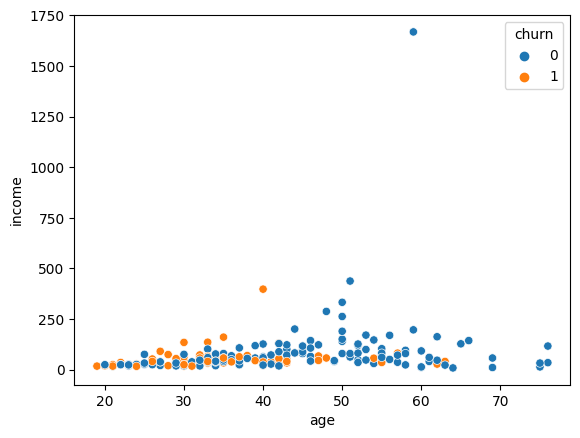

In [50]:
sns.scatterplot(data=data_clean, x='age', y='income', hue='churn')

<Axes: xlabel='tenure', ylabel='address'>

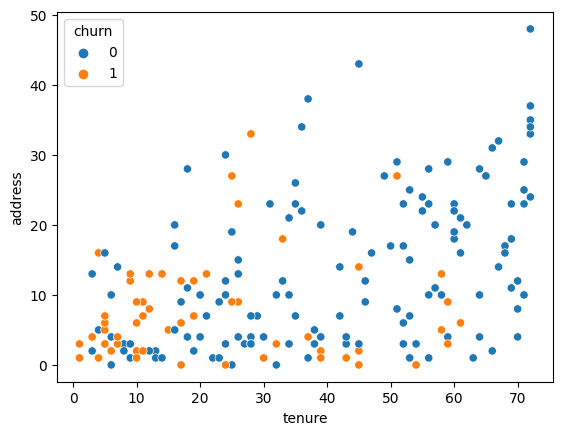

In [51]:
sns.scatterplot(data=data_clean, x='tenure', y='address', hue='churn')

In [52]:
# from sklearn import svm
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
index = ['AccuracyScore', 'JaccardScore']
best_kernel_df = pd.DataFrame(index=index)

for kernel in kernel:

  # Modeling:
  model_svm = svm.SVC(kernel=kernel)
  model_svm.fit(train_X, train_y)

  #Predicting:
  pred_y_svm = model_svm.predict(test_X)

  #Evaluation
  best_kernel_df[kernel] = [accuracy_score(test_y, pred_y_svm),
                            jaccard_score(test_y, pred_y_svm, pos_label=0)]

best_kernel_df

,linear,poly,rbf,sigmoid
AccuracyScore,0.525000,0.650000,0.700000,0.550000
JaccardScore,0.472222,0.631579,0.666667,0.513514


As you see the best kernel for our dataset is 'rbf'(defult kernel)

In [53]:
accuracy_score_svm = best_kernel_df['rbf']['AccuracyScore']
jaccard_score_svm = best_kernel_df['rbf']['JaccardScore']
print('Accuracy Score: ', accuracy_score_svm)
print('Jaccard Score: ', jaccard_score_svm)

Accuracy Score:  0.7
Jaccard Score:  0.6666666666666666


## Decision Tree

### Modeling

In [54]:
# from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(max_depth=30)
model_decision_tree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=30)

### Predicting

In [55]:
pred_y_decision_tree = model_decision_tree.predict(test_X)
print(pred_y_decision_tree[0:5])
print(test_y[0:5].values)

[0 1 1 0 0]
[0 0 1 0 1]


### Evaluation

In [56]:
accuracy_score_decision_tree = accuracy_score(test_y, pred_y_decision_tree)
print('Accuracy Score: ', accuracy_score_decision_tree)

Accuracy Score:  0.5


In [57]:
jaccard_score_decision_tree = jaccard_score(test_y, pred_y_decision_tree, pos_label=0)
print('Jaccard Score: ', jaccard_score_decision_tree)

Jaccard Score:  0.4444444444444444


## K-neariest neghbors(KNN)

### Modeling

In [58]:
ks = 15
acc_score = []
jacc_score = []

for k in range(1, ks+1):

  # Modeling
  model_knn = KNeighborsClassifier(n_neighbors=k)
  model_knn.fit(train_X, train_y)

  # Predicting
  pred_y_knn = model_knn.predict(test_X)

  # Evaluation
  acc_score.append(accuracy_score(test_y, pred_y_knn))
  jacc_score.append(jaccard_score(test_y, pred_y_knn, pos_label=0))

acc_score = np.array(acc_score)
jacc_score = np.array(jacc_score)
print(acc_score)
print('##-------------------------------------------------------')
print(jacc_score)

# For the best k value
the_best_k_value = 2 # According to acc_score and jacc_score sets
accuracy_score_knn = acc_score[the_best_k_value-1]
jaccard_score_knn = jacc_score[the_best_k_value-1]
print('The best value of k is:', the_best_k_value,
      'with accuracy score', accuracy_score_knn,
      'with jaccard score', jaccard_score_knn)

[0.65  0.675 0.65  0.675 0.65  0.65  0.625 0.625 0.625 0.575 0.6   0.6
 0.675 0.6   0.675]
##-------------------------------------------------------
[0.58823529 0.64864865 0.61111111 0.64864865 0.6        0.63157895
 0.59459459 0.60526316 0.59459459 0.56410256 0.57894737 0.57894737
 0.62857143 0.57894737 0.62857143]
The best value of k is: 2 with accuracy score 0.675 with jaccard score 0.6486486486486487


## Comparing

In [59]:
accuracy = {'AccuracyScore': [accuracy_score_log_reg,
                              accuracy_score_svm,
                              accuracy_score_decision_tree,
                              accuracy_score_knn],
            'JaccardScore': [jaccard_score_log_reg,
                             jaccard_score_svm,
                             jaccard_score_decision_tree,
                             jaccard_score_knn]}
index = ['LogReg', 'SVM', 'DecisionTree', 'KNN']
compare_df = pd.DataFrame(data=accuracy, index=index)
compare_df

,AccuracyScore,JaccardScore
LogReg,0.650,0.562500
SVM,0.700,0.666667
DecisionTree,0.500,0.444444
KNN,0.675,0.648649


In [60]:
compare_df.loc[compare_df.idxmax()]

,AccuracyScore,JaccardScore
SVM,0.7,0.666667
SVM,0.7,0.666667


As you see the best method to classification is SVM for this dataset.